<a href="https://colab.research.google.com/github/kashishthakur26/MLprojects/blob/main/Stock_price_prediction_TATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[: , 1:2].values

In [3]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [4]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### We want our data to be in the form of 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using Numpy. Then, we convert the data into a 3D array with X_train_samples, 60 timestamps and one feature at each step.

In [13]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one output. Next, we compile the model using the adam optimizer and set the loss as the mean_squared_error

In [15]:
model = Sequential()

model.add(LSTM(units=50 , return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
62/62 [==============================] - 9s 20ms/step - loss: 0.0093
Epoch 2/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0033
Epoch 3/100
62/62 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 1s 24ms/step - loss: 0.0042
Epoch 5/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 7/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 8/100
62/62 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0017
Epoch 11/100
62/62 [==============================] - 1s 14ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 13/100
62/62 [=====

In [16]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

Before predicting future stock prices , we have to manipulate the trinaing set; we merge the training set and the test set on the 0  axis , set the time step to 60, use minmaxscler,and reshape the dataset as done previously. After making predictions, we use inverse_transform to get back the stock prices in normal readacle format.

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


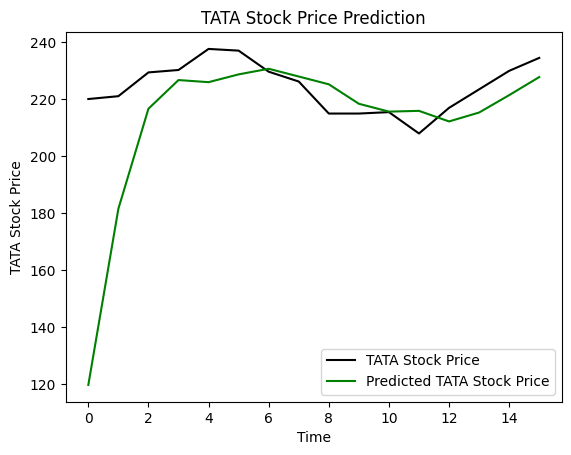

In [18]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()